<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220728_ML_Project_Walkthrough_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/12/18/machine-learning-project-walkthrough-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
data_train = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/Titanic/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/Titanic/test.csv')

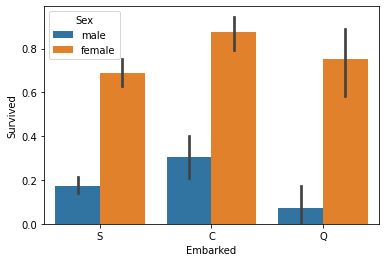

In [20]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=data_train)
plt.show()

In [21]:
def simplify_ages(df):
  df.Age = df.Age.fillna(-0.5)
  bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
  group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
  categories = pd.cut(df.Age, bins, labels=group_names)
  df.Age = categories
  return df

In [22]:
def simplify_cabins(df):
  df.Cabin = df.Cabin.fillna('N')
  df.Cabin = df.Cabin.apply(lambda x: x[0])
  return df

In [23]:
def simplify_fares(df):
  df.Fare = df.Fare.fillna(-0.5)
  bins = (-1, 0, 8, 15, 31, 1000)
  group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
  categories = pd.cut(df.Fare, bins, labels=group_names)
  df.Fare = categories
  return df

In [24]:
def format_name(df):
  df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
  df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
  return df

In [25]:
def drop_features(df):
  return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

In [26]:
def transform_features(df):
  df = simplify_ages(df)
  df = simplify_cabins(df)
  df = simplify_fares(df)
  df = format_name(df)
  df = drop_features(df)
  return df

In [27]:
data_train = transform_features(data_train)

In [32]:
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,Young Adult,0,0,2_quartile,N,"Montvila,",Rev.
887,888,1,1,female,Student,0,0,3_quartile,B,"Graham,",Miss.
888,889,0,3,female,Unknown,1,2,3_quartile,N,"Johnston,",Miss.
889,890,1,1,male,Young Adult,0,0,3_quartile,C,"Behr,",Mr.


In [28]:
data_test = transform_features(data_test)

In [33]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,male,Young Adult,0,0,1_quartile,N,"Kelly,",Mr.
1,893,3,female,Adult,1,0,1_quartile,N,"Wilkes,",Mrs.
2,894,2,male,Senior,0,0,2_quartile,N,"Myles,",Mr.
3,895,3,male,Young Adult,0,0,2_quartile,N,"Wirz,",Mr.
4,896,3,female,Student,1,1,2_quartile,N,"Hirvonen,",Mrs.
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,Unknown,0,0,2_quartile,N,"Spector,",Mr.
414,1306,1,female,Adult,0,0,4_quartile,C,Oliva,y
415,1307,3,male,Adult,0,0,1_quartile,N,"Saether,",Mr.
416,1308,3,male,Unknown,0,0,2_quartile,N,"Ware,",Mr.


In [29]:
from sklearn import preprocessing

In [34]:
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

In [35]:
data_train, data_test = encode_features(data_train, data_test)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x_all, y_all, test_size=num_test, random_state=23)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((712, 9), (179, 9), (712,), (179,))

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [40]:
model = RandomForestClassifier()

In [41]:
parameters = {'n_estimators':[4,6,9], 'max_features':['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'],
              'max_depth':[2,3,5,10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1,5,8]}

In [42]:
acc_scorer = make_scorer(accuracy_score)

In [43]:
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(xtrain, ytrain)

In [44]:
model = grid_obj.best_estimator_
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=9)

In [45]:
ypred = model.predict(xtest)
print(accuracy_score(ytest, ypred))

0.8212290502793296


In [47]:
from sklearn.model_selection import KFold

In [62]:
def run_kfold(clf):
  x = x_all
  kf = KFold(891)
  outcomes =[]
  fold = 0
  for train_index, test_index in kf.split(x):
    fold += 1
    xtrain, xtest = x_all.values[train_index], x_all.values[test_index]
    ytrain, ytest = y_all.values[train_index], y_all.values[test_index]
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    outcomes.append(accuracy)
    print('Fold {0} accuracy: {1}'.format(fold, accuracy))
  mean_outcome = np.mean(outcomes)
  print(f'Mean Accuracy: {mean_outcome}')

In [63]:
run_kfold(model)

Fold 1 accuracy: 1.0
Fold 2 accuracy: 1.0
Fold 3 accuracy: 1.0
Fold 4 accuracy: 1.0
Fold 5 accuracy: 1.0
Fold 6 accuracy: 1.0
Fold 7 accuracy: 1.0
Fold 8 accuracy: 1.0
Fold 9 accuracy: 1.0
Fold 10 accuracy: 1.0
Fold 11 accuracy: 0.0
Fold 12 accuracy: 1.0
Fold 13 accuracy: 1.0
Fold 14 accuracy: 1.0
Fold 15 accuracy: 0.0
Fold 16 accuracy: 1.0
Fold 17 accuracy: 1.0
Fold 18 accuracy: 0.0
Fold 19 accuracy: 0.0
Fold 20 accuracy: 1.0
Fold 21 accuracy: 1.0
Fold 22 accuracy: 1.0
Fold 23 accuracy: 1.0
Fold 24 accuracy: 0.0
Fold 25 accuracy: 1.0
Fold 26 accuracy: 0.0
Fold 27 accuracy: 1.0
Fold 28 accuracy: 1.0
Fold 29 accuracy: 1.0
Fold 30 accuracy: 1.0
Fold 31 accuracy: 1.0
Fold 32 accuracy: 1.0
Fold 33 accuracy: 1.0
Fold 34 accuracy: 1.0
Fold 35 accuracy: 1.0
Fold 36 accuracy: 1.0
Fold 37 accuracy: 0.0
Fold 38 accuracy: 1.0
Fold 39 accuracy: 0.0
Fold 40 accuracy: 1.0
Fold 41 accuracy: 1.0
Fold 42 accuracy: 0.0
Fold 43 accuracy: 1.0
Fold 44 accuracy: 1.0
Fold 45 accuracy: 1.0
Fold 46 accuracy: 1

In [65]:
ids = data_test['PassengerId']
ypred = model.predict(data_test.drop('PassengerId', axis=1))
output = pd.DataFrame({'PassengerId': ids, 'Survived':ypred})
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
